In [111]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [112]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

This is an example to demonstrate SGD. It will use a quadratic function to depict the loss function and x will depict a weight parameter of the function.

The algorithm goes as follows:
1. Intialize the weights randomly
2. For each image, use weights for prediction
3. Based on predictions, calculate how good the model is (its Loss, big loss = bad, small loss = better)
4. Calculate the gradient for each weight, which tells us how changing the weight will affect the loss
5. Step (change) all weights based on their respective gradients
6. Repeat from step 2
7. Iterate until you decide to stop

In [113]:
def f(x): return x**2

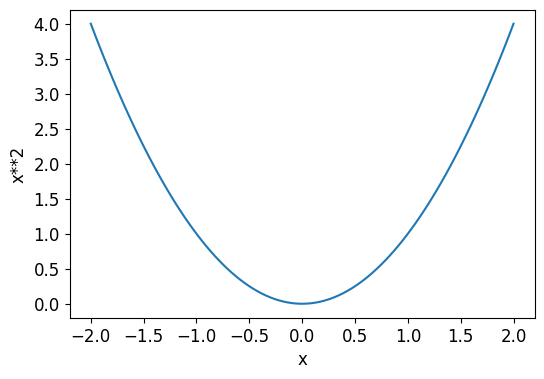

In [114]:
plot_function(f, 'x', 'x**2')

When initializing weights, we want to randomly assign them since we have a method of improving them (so we don't really care where they start off at). Let's say that our random weight (x) starts off at coordinates -1.5, (1.5)^2

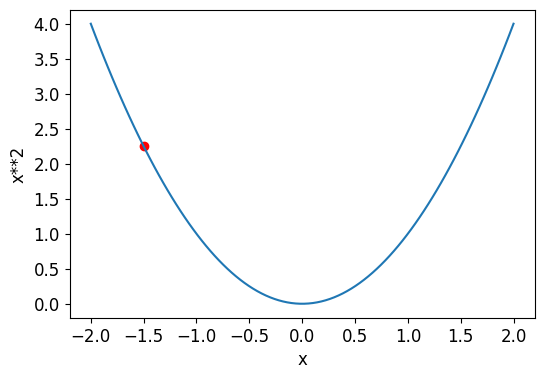

In [115]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

When we increase/decrease our parameter by a little bit (the adjustment), we will end up with huge changes because of the gradient. We know which direction to go because of said gradient. 

So the plan is to keep going in the direction of the gradient and continue to make tweaks to the weight until we reach the bottom of the curve.

Calculating Gradients

We can use PyTorch to easily calculate the gradients for us for each weight. All we need to do is essentially "tag" the variable with the .requires_grad_() and this'll make sure PyTorch will calculate the gradients for all the weights.

In [116]:
xt = tensor(3.)
xt.requires_grad_()

tensor(3., requires_grad=True)

Now we calculate the value using our quadratic function from earlier and have PyTorch calculate the gradients for us

In [117]:
yt = f(xt)
yt.backward()

Now that we have the gradients calculated for us, so xt now has a tag called grad.

In [118]:
xt.grad

tensor(6.)

In [119]:
xt = tensor([3.,4.,10.]).requires_grad_()
def f(x): return (x**2).sum()
yt = f(xt)
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

End to End SGD Problem (to make sure I know how to do it)

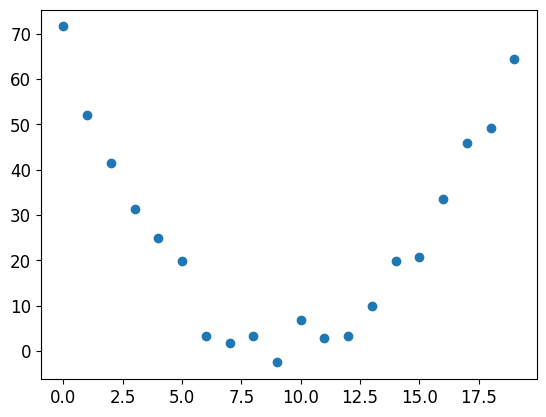

In [120]:
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

The plan is to use SGD to predict the best parameters (a,b,c) for this function.

In [121]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

For parameters to be considered "best" we need a way to calculate this. For that, we use the mean-squared-error loss function (more common for continuous data):

In [122]:
def mse(preds, targets): return ((preds - targets)**2).mean()

With all of that in mind, we now go through the 7 step process:

In [123]:
params = torch.randn(3).requires_grad_()

Now we calculate the predictions

In [124]:
preds = f(time, params)

We can create a function to show us how close our predictions are to the targets:

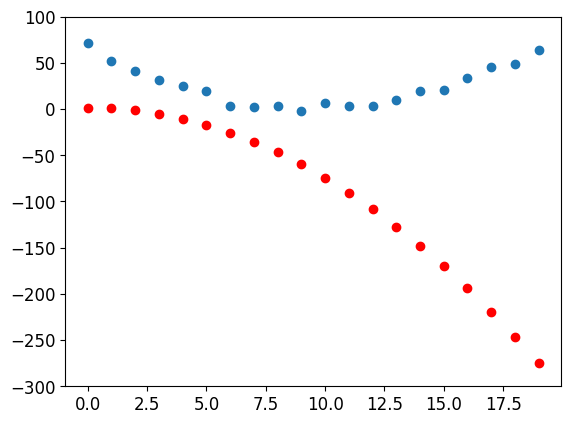

In [125]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
    
show_preds(preds)

Our next step will be to calculate the loss using our loss function

In [126]:
loss = mse(preds,speed)
loss

tensor(22845.3906, grad_fn=<MeanBackward0>)

Now we calculate the gradients

In [127]:
loss.backward()
params.grad

tensor([-50025.8867,  -3200.6177,   -235.6507])

Now well use these gradients to step our parameters with a learning rate of 1e-5

In [128]:
lr = 1e-5
params.data -= params.grad.data * lr
params.grad = None

Now let's see if there's an improvement:

In [129]:
preds = f(time,params)
mse(preds, time)

tensor(2857.0171, grad_fn=<MeanBackward0>)

Clearly, there's been an improvement. So now we're going to create a function to apply each step:

In [133]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= params.grad.data * lr
    params.grad = None
    if prn: print(loss.item())
    return preds

Now we're going to loop the apply_step function 10 times and see the result:

In [134]:
for _ in range(10): apply_step(params)

4815.33642578125
678.2869873046875
620.634765625
609.7222900390625
607.6544799804688
607.2604370117188
607.1830444335938
607.1656494140625
607.1594848632812
607.1553955078125
